In [152]:
#importaciones
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mpldates

In [153]:
#lectura de datos
events = pd.read_csv('events.csv.gzip', compression='gzip', 
                     dtype={
                         'device_countrycode': 'category', 
                         'device_city': 'category',
                         'ref_type': 'category',
                         'application_id': 'uint16',
                         'device_os_version': 'category',
                         'device_brand': 'category',
                         'device_model': 'category',
                         'session_user_agent': 'category',
                         'trans_id': 'category',
                         'user_agent': 'category',
                         'carrier': 'category',
                         'device_os': 'category',
                         'device_os_version': 'category',
                         'device_language': 'category',
                         'connection_type': 'category',
                         'wifi': 'category'
                     })

In [154]:
events.dtypes

date                    object
event_id                 int64
ref_type              category
ref_hash                 int64
application_id          uint16
attributed                bool
device_countrycode    category
device_os_version     category
device_brand          category
device_model          category
device_city           category
session_user_agent    category
trans_id              category
user_agent            category
event_uuid              object
carrier               category
kind                   float64
device_os             category
wifi                  category
connection_type       category
ip_address               int64
device_language       category
dtype: object

In [155]:
events.wifi.dtype

CategoricalDtype(categories=['false', 'true'], ordered=False)

In [156]:
# Empecemos por explorar events

events.describe()

,event_id,ref_hash,application_id,kind,ip_address
count,2.494423e+06,2.494423e+06,2.494423e+06,2.489324e+06,2.494423e+06
mean,9.970445e+01,4.641486e+18,9.910934e+01,5.364362e+18,4.620786e+18
std,1.070903e+02,2.660724e+18,5.780986e+01,2.242979e+18,2.672746e+18
min,0.000000e+00,1.633675e+14,0.000000e+00,7.758270e+16,5.287755e+12
25%,2.200000e+01,2.326142e+18,6.300000e+01,4.647949e+18,2.333410e+18
50%,3.100000e+01,4.688964e+18,6.600000e+01,5.500848e+18,4.541498e+18
75%,1.610000e+02,6.927594e+18,1.450000e+02,6.169667e+18,7.044307e+18
max,7.120000e+02,9.223316e+18,3.220000e+02,9.215473e+18,9.223367e+18


In [157]:
events.sample(10)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
2454092,2019-03-06 17:51:24.541,80,1494519392962156891,9015033372388273519,8,False,6333597102633388268,4.3537503246500966e+18,NaN,1.764701447250044e+18,...,NaN,NaN,ddf1b80b-a9a1-4d25-a2c0-b2a7ff62d52d,2.2481569642543155e+17,7.310429e+17,6.941824626260379e+18,NaN,Cable/DSL,6450830213052523380,3.3013777759776993e+18
687511,2019-03-08 14:30:59.309,31,1891515180541284343,27881097309189802,63,False,6333597102633388268,NaN,2.987569314309514e+18,4.689550129432457e+18,...,NaN,9.177081431590678e+18,84fb62b8-3f8e-4ce1-bf10-570fabeb5e00,NaN,8.820572e+18,NaN,true,NaN,3969187940513299807,6.977049253562486e+18
701924,2019-03-10 00:55:29.190,162,1494519392962156891,9031607860882908353,103,False,6333597102633388268,4.3537503246500966e+18,NaN,4.349815524632825e+18,...,NaN,NaN,033e375f-cc82-4f10-a153-9880ddce9f41,1.1795872560140132e+18,3.209078e+18,6.941824626260379e+18,NaN,Cellular,2168074889413837231,3.3013777759776993e+18
1555932,2019-03-12 17:33:17.587,31,1891515180541284343,165604604169489933,63,False,6333597102633388268,NaN,3.083058605577787e+17,1.7545278564638182e+18,...,NaN,6.59386819643465e+18,7a75b4d8-e1fc-4a30-9c78-043a5901ad78,NaN,8.820572e+18,NaN,true,NaN,5695876687325703915,6.977049253562486e+18
5388,2019-03-05 08:23:00.339,124,1891515180541284343,4183859604921633999,7,False,6333597102633388268,8.913929730553542e+18,NaN,3.624089450035605e+18,...,NaN,NaN,9047ebd6-12a0-49ed-b63e-8f1937652ca8,NaN,3.616554e+18,7.531669329342818e+18,NaN,NaN,4537476465028897433,3.3013777759776993e+18
2057083,2019-03-06 12:16:30.748,161,1891515180541284343,4081893439485844640,64,False,6333597102633388268,8.824598512074042e+18,NaN,5.613368587462819e+18,...,NaN,NaN,5ae77748-9fea-4116-99ac-24e8205e2d18,2.2481569642543155e+17,9.066788e+18,7.531669329342818e+18,NaN,Cable/DSL,2816498524844460196,3.3013777759776993e+18
668951,2019-03-07 02:43:02.623,31,1891515180541284343,80987292547846098,63,False,6333597102633388268,NaN,3.083058605577787e+17,2.4354500947795727e+18,...,NaN,8.089178157941562e+18,9c6697cd-c682-451e-beb1-09cf4518f6d5,NaN,8.820572e+18,NaN,false,NaN,9119945256901470801,6.977049253562486e+18
1542669,2019-03-11 22:33:12.272,31,1891515180541284343,8438307403451799569,63,False,6333597102633388268,NaN,3.083058605577787e+17,4.4452523127597215e+18,...,NaN,7.738334399785623e+18,df8bb71e-f915-4020-a180-b87481f04b2b,NaN,8.820572e+18,NaN,false,NaN,5381536667969792076,6.977049253562486e+18
1372685,2019-03-12 22:22:19.903,22,1891515180541284343,4038976471544369912,10,False,6333597102633388268,NaN,3.083058605577787e+17,5.990116681709081e+18,...,NaN,4.3922650149309645e+18,987dd387-ccda-4e39-8620-552ba4cf3f1c,NaN,5.500848e+18,NaN,true,NaN,3695601014994471799,9.0283826551012e+18
1327256,2019-03-13 03:54:40.751,272,1891515180541284343,7353468457788612428,120,False,6333597102633388268,NaN,NaN,NaN,...,NaN,NaN,ca4ce46d-43a6-458b-9be6-47b192574b68,NaN,6.168309e+18,NaN,NaN,NaN,7726314782926052608,NaN


In [158]:
# ¿Cuántos registros tiene?
events.size

54877306

In [159]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [160]:
events['wifi'].value_counts()

true     930902
false    447970
Name: wifi, dtype: int64

In [161]:
# elimino las filas que tengan todos sus valores en NaN
events.dropna(how='all')
events.shape

(2494423, 22)

In [162]:
events.size

54877306

In [163]:
del events['ref_hash']

In [164]:
del events['trans_id']

In [165]:
# desecho el país porque es siempre el mismo. No me suma información
del events['device_countrycode']

In [166]:
# son más de 2 millones, esto no es una categoría, además no aporta información relevante
del events['event_uuid']

In [167]:
events['device_os'].value_counts()

7.531669329342818e+18     389811
6.941824626260379e+18     260861
2.7488313570525307e+18      6110
5.916186881232351e+18        885
Name: device_os, dtype: int64

In [168]:
events['wifi'].value_counts()

true     930902
false    447970
Name: wifi, dtype: int64

In [169]:
events['connection_type'].value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [170]:
events['connection_type'].memory_usage(deep=True)

2494780

In [171]:
counts = events['device_language'].value_counts()
indexes = counts[counts<7000].index
mask_dict = dict.fromkeys(indexes, 'other')
events['device_language'] = events['device_language'].replace(mask_dict)
events['device_language'].value_counts()

6.977049253562486e+18     745898
3.3013777759776993e+18    589865
9.0283826551012e+18       388832
6.804427935983149e+18     340624
4.621024053086952e+18     150143
4.077062198952597e+17      53277
other                      29598
2.822843369618519e+17      28294
4.060929664968129e+18      25943
3.095855928498728e+18      25635
6.111820034171223e+18      18314
1.5264214271539814e+18     10181
Name: device_language, dtype: int64

In [172]:
events.memory_usage(deep=True)

Index                        80
date                  199553840
event_id               19955384
ref_type                2494655
application_id          4988846
attributed              2494423
device_os_version       2503308
device_brand            5018630
device_model            5275839
device_city             5003887
session_user_agent      5143927
user_agent              5552200
carrier                 2503547
kind                   19955384
device_os               2494896
wifi                    2494626
connection_type         2494700
ip_address             19955384
device_language       190584486
dtype: int64

In [173]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
application_id        2494423
attributed            2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
user_agent            1391527
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [174]:
events['application_id'].value_counts()

66     325696
64     259084
145    252431
63     181555
103    137513
57     134498
121    123711
212    108489
113     82962
39      76448
120     68421
149     60326
10      58311
170     55820
7       48005
8       38972
102     32579
248     31070
54      29284
166     27611
16      24365
125     23018
140     22215
136     15362
119     15282
45      14321
214     10112
134     10003
112      9871
43       9336
        ...  
127         3
62          3
232         3
91          3
135         2
36          2
290         2
49          2
11          2
228         2
209         2
206         2
117         2
188         2
81          2
322         1
25          1
86          1
132         1
146         1
155         1
158         1
165         1
240         1
245         1
255         1
286         1
295         1
305         1
154         1
Name: application_id, Length: 269, dtype: int64

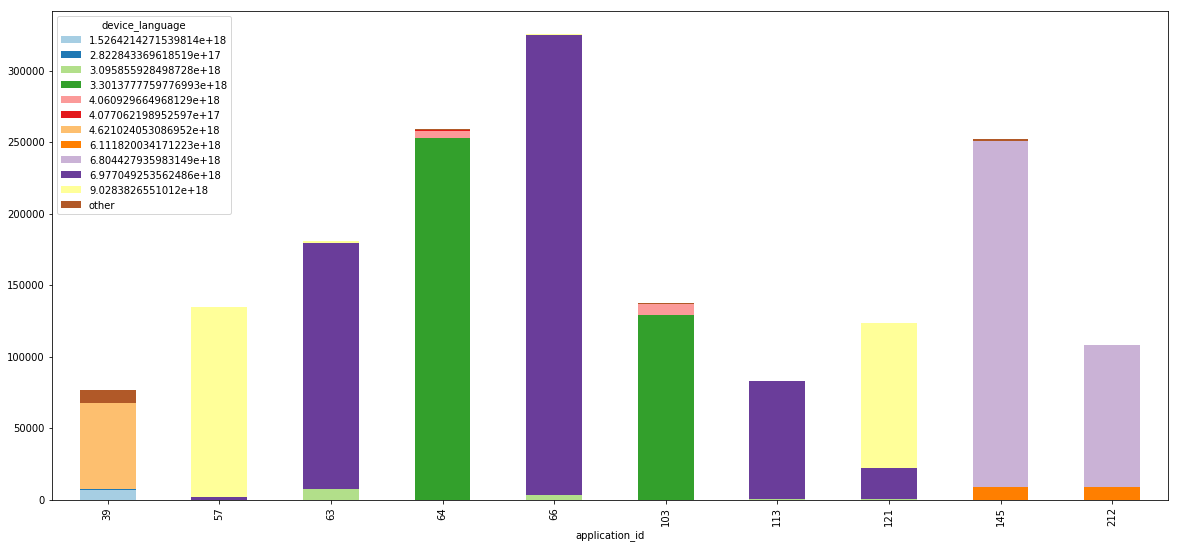

In [175]:
#Hay demasiadas aplicaciones, me quedo con las 10 que más eventos generan entonces
appcode = events['application_id'].value_counts().nlargest(10).index
top10apps = events[events['application_id'].isin(appcode)]
langs = top10apps[['application_id', 'device_language']].groupby('application_id').agg({'device_language' : 'value_counts'})
langs['device_language'].unstack().plot(kind = 'bar', stacked = True, figsize = (20,9), colormap = 'Paired')
plt.show()

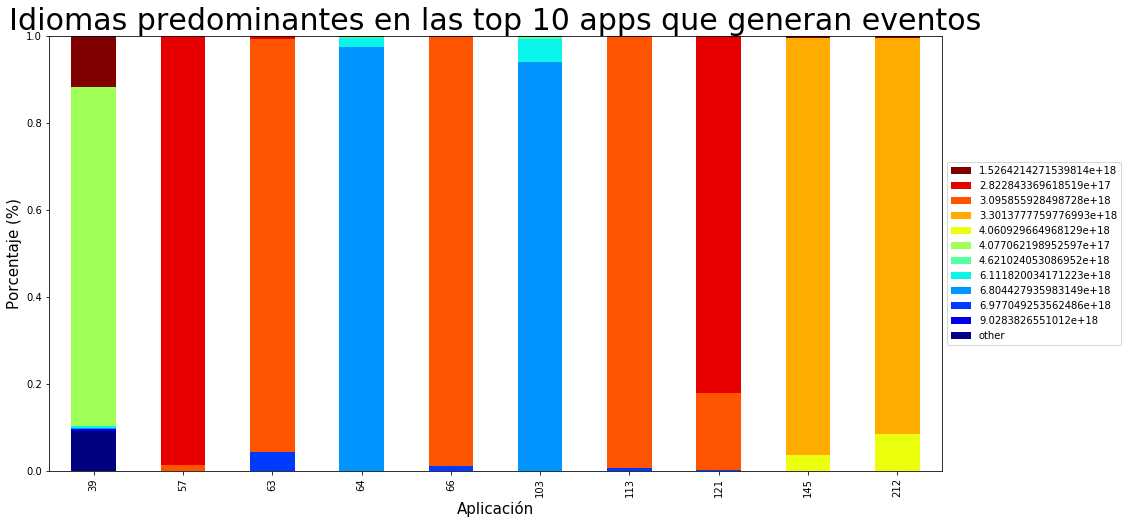

In [176]:
us = pd.DataFrame(top10apps.groupby(['application_id', 'device_language']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'device_language', index = 'application_id')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['other', '9.0283826551012e+18', '6.977049253562486e+18', '6.804427935983149e+18', '6.111820034171223e+18', '4.621024053086952e+18',
 '4.077062198952597e+17', '4.060929664968129e+18', '3.3013777759776993e+18', '3.095855928498728e+18', '2.822843369618519e+17', '1.5264214271539814e+18']
f = plt.figure()
plt.title('Idiomas predominantes en las top 10 apps que generan eventos',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Aplicación', size = 15);
ax.set_ylim(0,1)
plt.show()

In [177]:
events.head()

,date,event_id,ref_type,application_id,attributed,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,9.977660e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,2.551781375196177e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,8.561153e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,38,False,7.391843585977942e+18,NaN,5.960895846746644e+18,6.959330348495504e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,8.731902e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


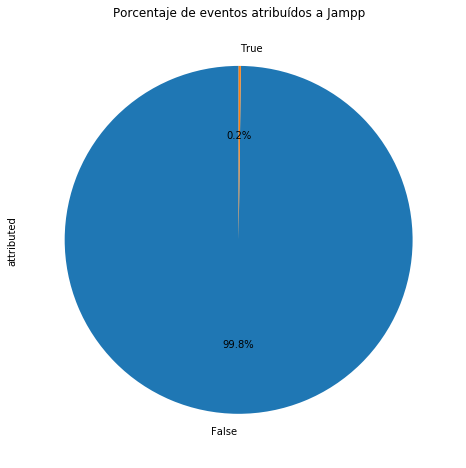

In [178]:
events['attributed'].value_counts().plot(kind = 'pie', figsize = (12,8), autopct = '%1.1f%%', startangle = 90, title = 'Porcentaje de eventos atribuídos a Jampp')
plt.show()

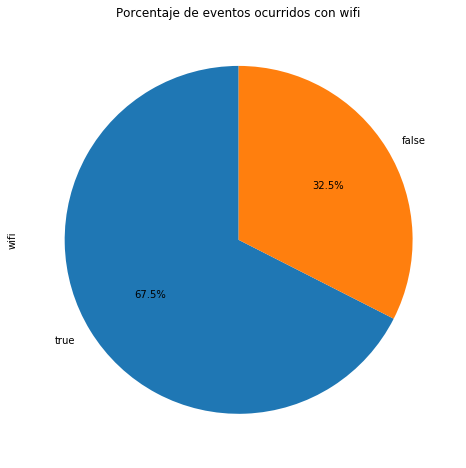

In [179]:
events['wifi'].value_counts().plot(kind = 'pie', figsize = (12,8), autopct = '%1.1f%%', startangle = 90, title = 'Porcentaje de eventos ocurridos con wifi')
plt.show()

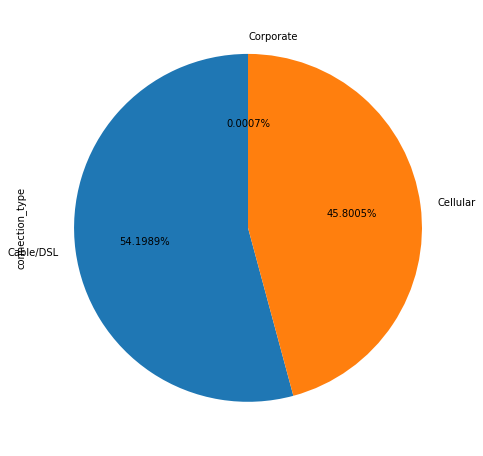

In [180]:
conexiones = events[events['connection_type'].notnull()]
conexiones['connection_type'].value_counts().plot(kind = 'pie', figsize = (12,8), autopct = '%1.4f%%', startangle = 90)
plt.show()

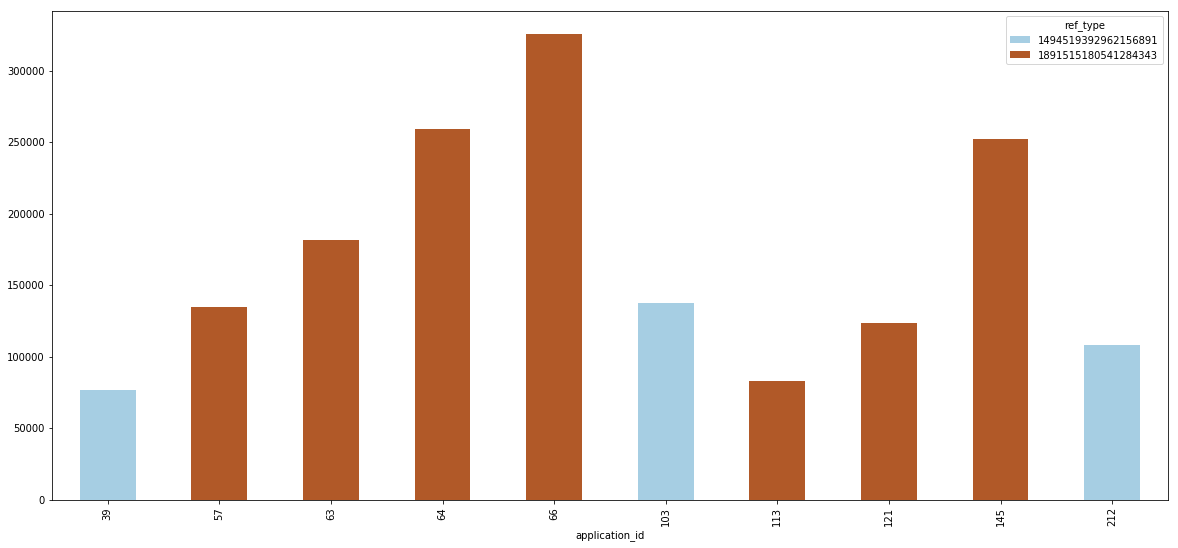

In [181]:
os = top10apps[['application_id', 'ref_type']].groupby('application_id').agg({'ref_type' : 'value_counts'})
os['ref_type'].unstack().plot(kind = 'bar', stacked = True, figsize = (20,9), colormap = 'Paired')
plt.show()

In [182]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
application_id        2494423
attributed            2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
user_agent            1391527
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [183]:
counts = top10apps['session_user_agent'].value_counts()
indexes = counts[counts<10000].index
mask_dict = dict.fromkeys(indexes, 'other')
top10apps.loc[:,'session_user_agent'] = top10apps['session_user_agent'].replace(mask_dict)
top10apps[top10apps['application_id'] == 66]['session_user_agent'].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


3.819516403548394e+18    325696
Name: session_user_agent, dtype: int64

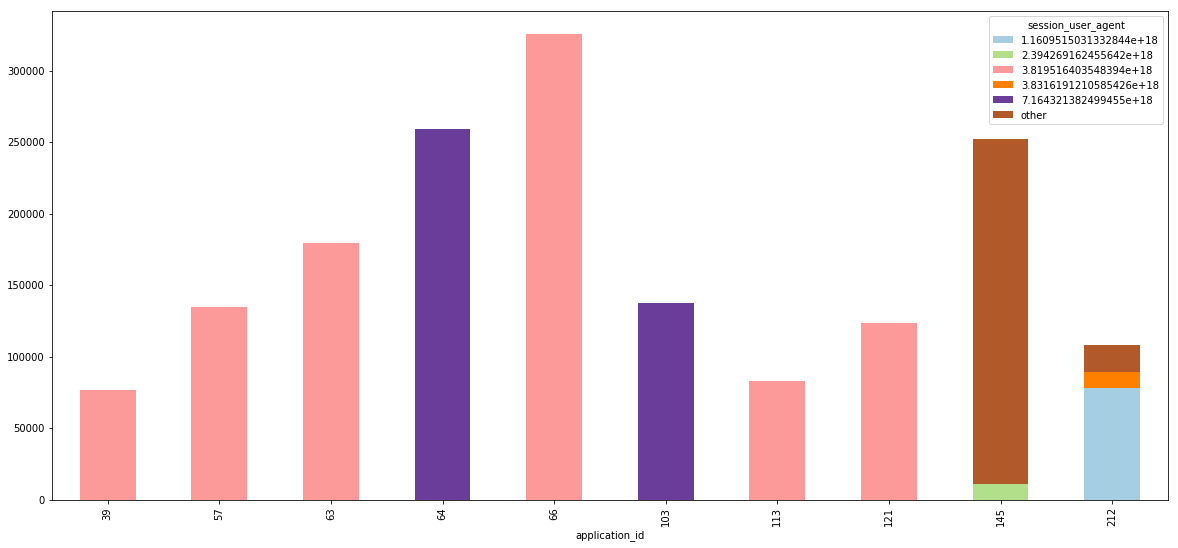

In [184]:
sua = top10apps[['application_id', 'session_user_agent']].groupby('application_id').agg({'session_user_agent' : 'value_counts'})
sua['session_user_agent'].unstack().plot(kind = 'bar', stacked = True, figsize = (20,9), colormap = 'Paired')
plt.show()

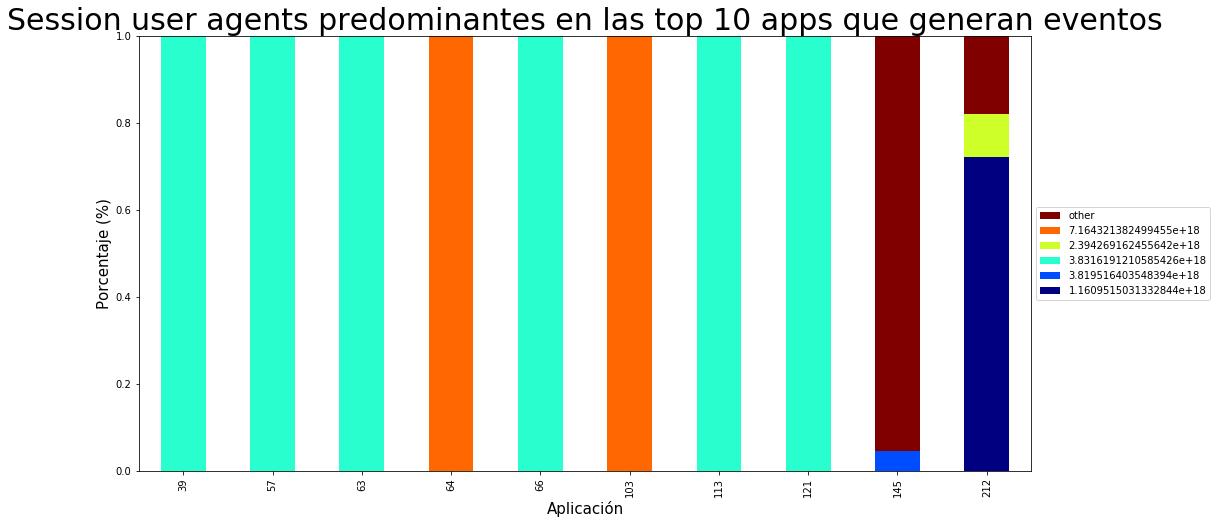

In [185]:
us = pd.DataFrame(top10apps.groupby(['application_id', 'session_user_agent']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'session_user_agent', index = 'application_id')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['1.1609515031332844e+18', '3.819516403548394e+18', '3.8316191210585426e+18', '2.394269162455642e+18', '7.164321382499455e+18', 'other']
f = plt.figure()
plt.title('Session user agents predominantes en las top 10 apps que generan eventos',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Aplicación', size = 15);
ax.set_ylim(0,1)
plt.show()

Ahora terminé de transformar en categorías los valores más repetidos, con esto liberé un poco de memoria para trabajar más rápido.

# Empiezo a hacer preguntas

## Qué eventos son más comunes?

In [186]:
events.dtypes

date                    object
event_id                 int64
ref_type              category
application_id          uint16
attributed                bool
device_os_version     category
device_brand          category
device_model          category
device_city           category
session_user_agent    category
user_agent            category
carrier               category
kind                   float64
device_os             category
wifi                  category
connection_type       category
ip_address               int64
device_language         object
dtype: object

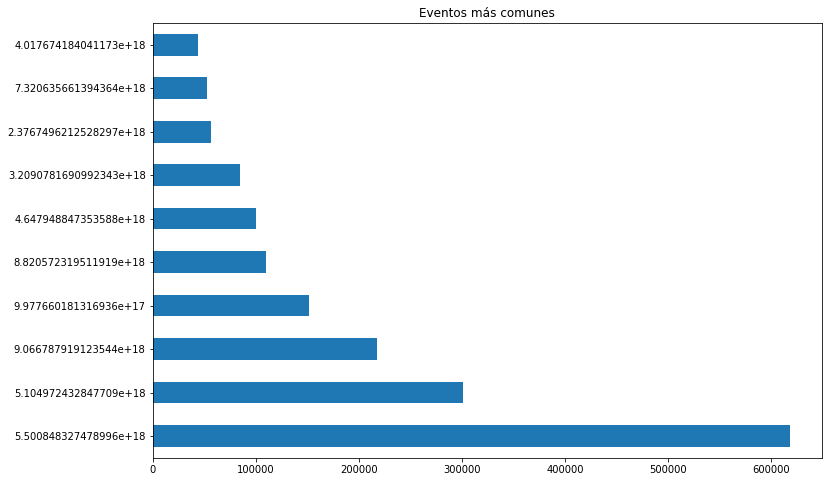

In [187]:
code = events['kind'].value_counts().nlargest(10).index
top10events = events[events['kind'].isin(code)]
top10events['kind'].value_counts().nlargest(10).plot(kind = 'barh', figsize = (12, 8), title = 'Eventos más comunes')
plt.show()

In [189]:
top10events['application_id']

1           38
9           38
47          38
50          38
53          38
65          38
72          38
93          38
94          38
109         38
112         38
116         38
119         38
122         38
154         41
155         41
156         41
157         41
158         41
159         41
160         41
161         41
162         41
163         41
164         41
165         41
166         41
167         41
168         41
169         41
          ... 
2494392    213
2494393    213
2494394    213
2494395    213
2494396    213
2494397    213
2494398    213
2494399    213
2494400    213
2494401    213
2494402    213
2494403    213
2494404    213
2494405    213
2494406    213
2494407    213
2494408    213
2494409    213
2494410    213
2494412    213
2494413    213
2494414    213
2494415    213
2494416    213
2494417    213
2494418    213
2494419    213
2494420    213
2494421    213
2494422    213
Name: application_id, Length: 1736263, dtype: uint16

## Hay una relación entre los eventos y el día de la semana?

In [190]:
events['date'] = pd.to_datetime(events['date'])

In [191]:
events['dayofweek'] = events['date'].dt.dayofweek

In [192]:
events.groupby('dayofweek')['event_id'].count()

dayofweek
0    268884
1    537214
2    569772
3    253706
4    285535
5    286221
6    293091
Name: event_id, dtype: int64

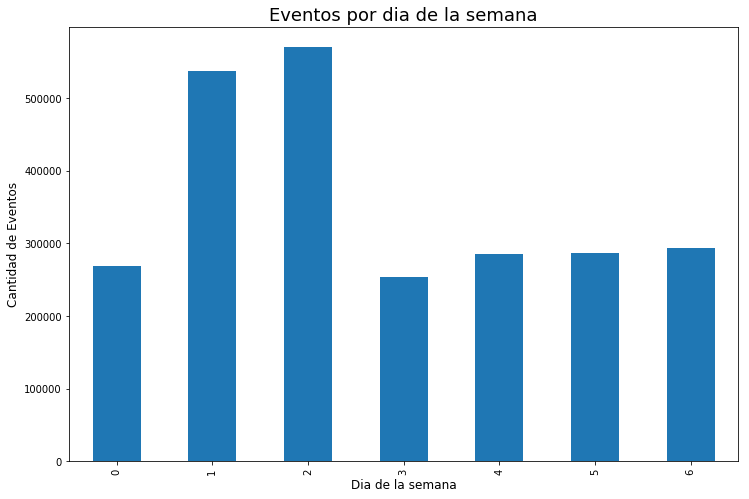

In [193]:
events['date'].dt.dayofweek.value_counts().sort_index().plot(kind = 'bar', figsize = (12,8))
plt.title("Eventos por dia de la semana", fontsize=18)
plt.xlabel("Dia de la semana", fontsize=12)
plt.ylabel("Cantidad de Eventos", fontsize=12)
plt.show()

## Hay una relación entre los eventos y el mes en que estamos?

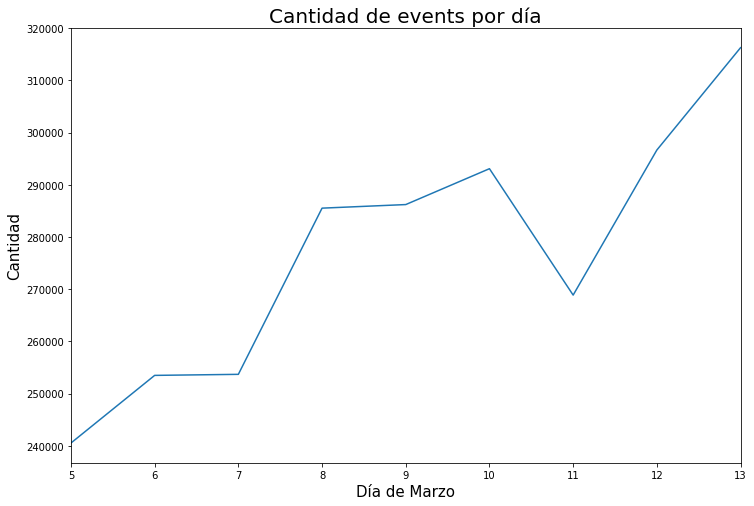

In [194]:
events['date'].dt.day.value_counts().sort_index().plot(figsize = (12,8))
plt.title('Cantidad de events por día', size = 20)
plt.xlabel('Día de Marzo', size = 15)
plt.ylabel('Cantidad', size = 15)
plt.show()

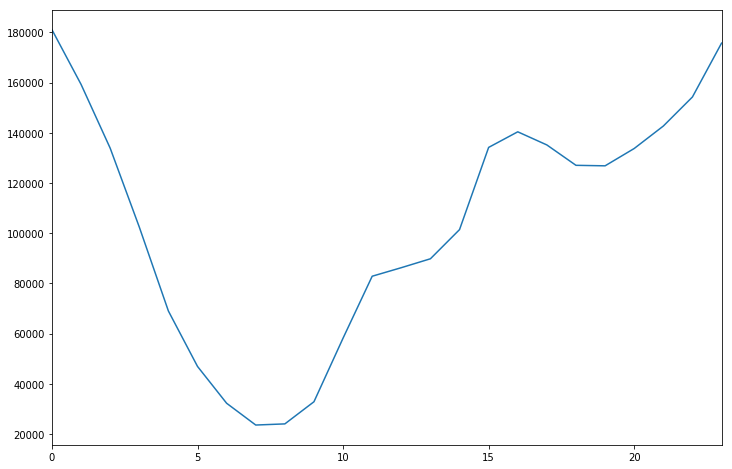

In [195]:
events['date'].dt.hour.value_counts().sort_index().plot(figsize = (12,8))
plt.show()

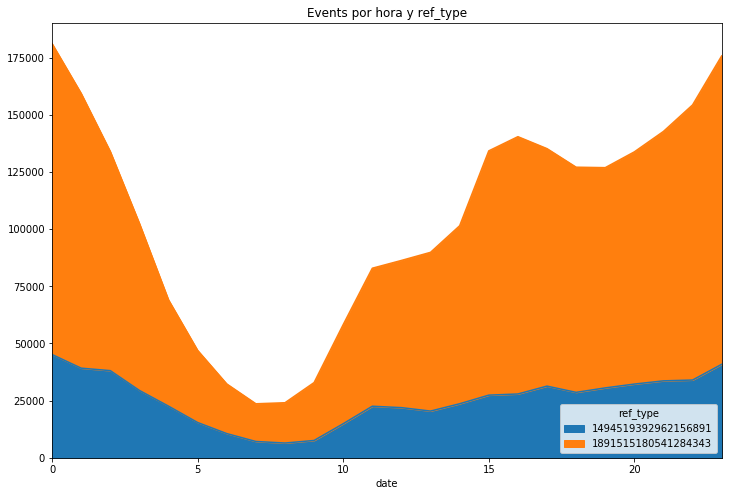

In [196]:
ref_types = events[['date', 'ref_type']].groupby(events['date'].dt.hour).agg({'ref_type' : 'value_counts'})
ref_types['ref_type'].unstack().plot(kind = 'area', figsize = (12,8), title = 'Events por hora y ref_type')
plt.show()

## Hay una relación entre los eventos y el dispositivo que se usa?

## En qué días y horarios se da la mayor cantidad de eventos?

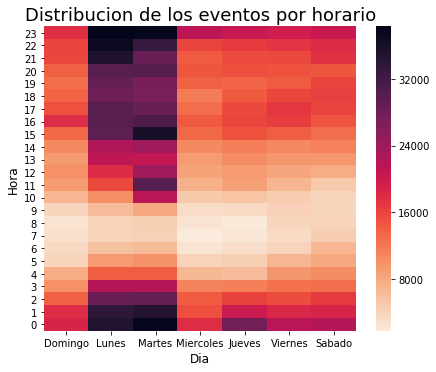

In [197]:
eventos_dia_hora = events.groupby(["dayofweek",events['date'].dt.hour])["event_id",].count()
pivot_post = eventos_dia_hora.pivot_table(index="date", columns="dayofweek", values= "event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, xticklabels=['Domingo','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado'], cmap=cmap)
g.set_title("Distribucion de los eventos por horario", fontsize=18)
g.set_xlabel("Dia", fontsize=12)
g.set_ylabel("Hora", fontsize=12)
plt.show()

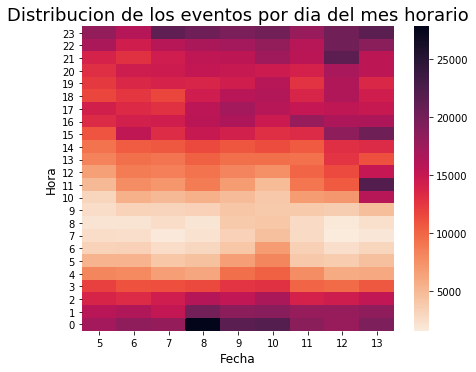

In [198]:
events["day"] = events["date"].dt.day
eventos_dia_del_mes_hora = events.groupby(["day",events['date'].dt.hour])["event_id",].count()
pivot_post = eventos_dia_del_mes_hora.pivot_table(index="date", columns="day", values= "event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, cmap=cmap)
g.set_title("Distribucion de los eventos por dia del mes horario", fontsize=18)
g.set_xlabel("Fecha", fontsize=12)
g.set_ylabel("Hora", fontsize=12)
plt.show()

## Hay una relación entre algún tipo de evento y la ciudad?

In [199]:
eventos_por_tipo_ciudad = events.groupby(["device_city", "kind"])['event_id',].count()

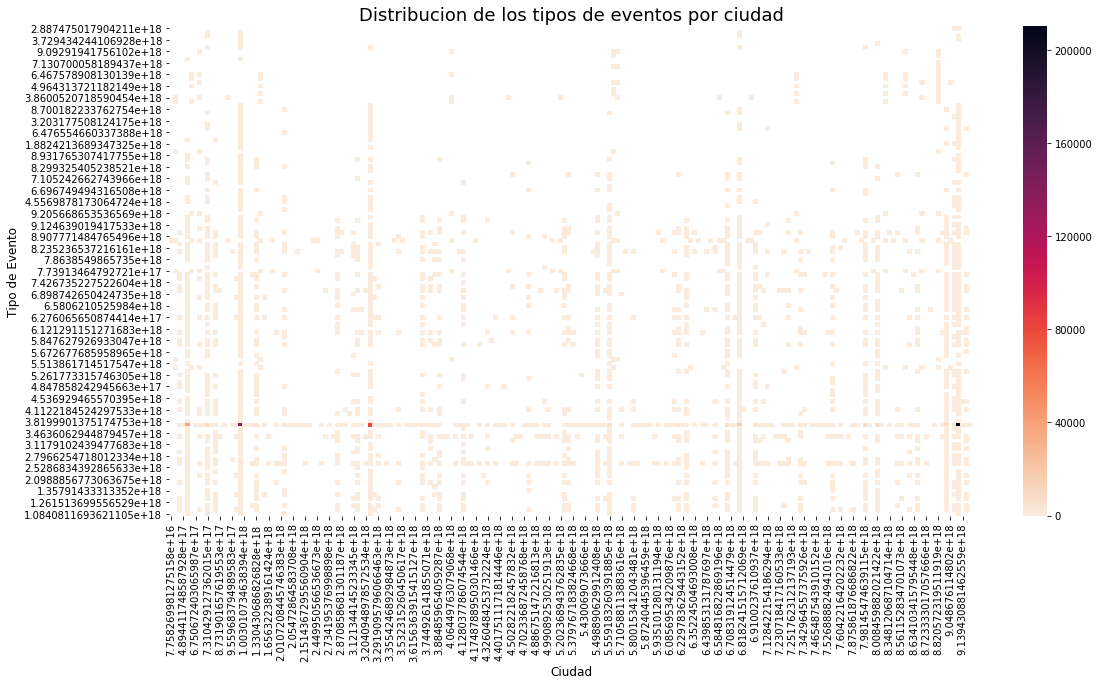

In [200]:
pivot_post = eventos_por_tipo_ciudad.pivot_table(index="device_city", columns="kind", values="event_id")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(18,9))
cmap = sns.cm.rocket_r
g = sns.heatmap(pivot_post, cmap=cmap)
g.set_title("Distribucion de los tipos de eventos por ciudad", fontsize=18)
g.set_xlabel("Ciudad", fontsize=12)
g.set_ylabel("Tipo de Evento", fontsize=12)
plt.show()

In [201]:
top10events['device_city'].value_counts()

3.8000799488967747e+18    430784
8.223209269143922e+18       3236
2.551781375196177e+18       3053
7.602876036620469e+18       1495
3.2582150459884605e+18      1410
8.578626579239988e+17       1341
5.801433683024338e+18       1306
6.276065650874414e+17        811
4.4246229588650675e+18       751
8.985217056239735e+18        651
8.235236537216161e+18        582
6.102141091106202e+18        567
4.847858242945663e+17        519
4.1122184524297533e+18       491
2.0489923564619796e+18       460
8.318795483645021e+18        460
1.16468287562278e+18         412
2.715324676035127e+18        401
1.3535971026191767e+18       289
1.1895429525854325e+17       267
6.434016956850084e+17        256
1.0840811693621105e+18       245
8.127301688691997e+17        244
5.261773315746305e+18        223
9.148931363827894e+18        183
6.959330348495504e+18        182
1.2816911001604083e+18       175
6.898742650424735e+18        168
6.696749494316508e+18        167
5.847627926933047e+18        152
          

## Qué dispositivo se usa en cada la ciudad?

In [202]:
ciudades = events[events['device_city'].notnull()]
ciudades['device_city'].value_counts().nsmallest(50).sum()

802

In [203]:
events.head()

,date,event_id,ref_type,application_id,attributed,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,dayofweek,day
0,2019-03-05 00:09:36.966,0,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17,1,5
1,2019-03-05 00:09:38.920,1,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,9.977660e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17,1,5
2,2019-03-05 00:09:26.195,0,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,3.2582150459884605e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,5.516623e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17,1,5
3,2019-03-05 00:09:31.107,2,1891515180541284343,38,False,5.908703034097298e+17,NaN,5.990116681709081e+18,2.551781375196177e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,8.561153e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17,1,5
4,2019-03-09 21:00:36.585,3,1891515180541284343,38,False,7.391843585977942e+18,NaN,5.960895846746644e+18,6.959330348495504e+18,7.164321382499455e+18,NaN,2.2481569642543155e+17,8.731902e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18,5,9


In [204]:
top10events['device_os'].value_counts()

7.531669329342818e+18     289940
6.941824626260379e+18     164139
5.916186881232351e+18          0
2.7488313570525307e+18         0
Name: device_os, dtype: int64

In [205]:
counts = top10events['device_city'].value_counts()
indexes = counts[counts<100].index
mask_dict = dict.fromkeys(indexes, 'other')
events.loc[:,'device_city'] = events['device_city'].replace(mask_dict)

In [206]:
counts = events['carrier'].value_counts()
indexes = counts[counts<10000].index
mask_dict = dict.fromkeys(indexes, 'other')
events.loc[:,'carrier'] = events['carrier'].replace(mask_dict)

In [207]:
counts = events['application_id'].value_counts()
indexes = counts[counts<1000].index
mask_dict = dict.fromkeys(indexes, 'other')
events.loc[:,'application_id'] = events['application_id'].replace(mask_dict)
events['carrier'].value_counts()

2.2481569642543155e+17    436983
1.1795872560140132e+18     80958
7.855224497172788e+18      58478
6.948827726700092e+18      29574
other                      10441
Name: carrier, dtype: int64

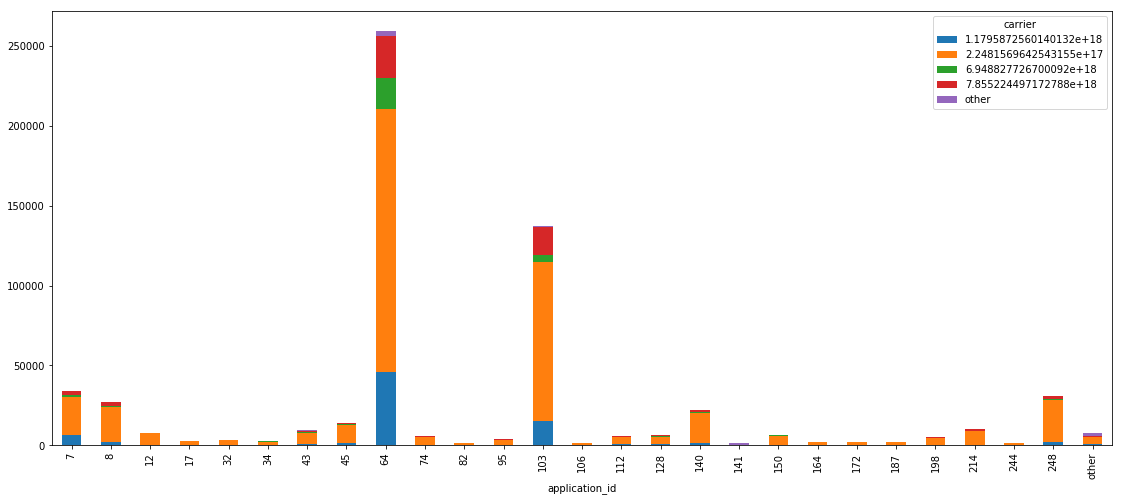

In [208]:
carriers = events[['application_id', 'carrier']].groupby('application_id').agg({'carrier' : 'value_counts'})
carriers['carrier'].unstack().plot(kind = 'bar', stacked = True, figsize = (19,8))
plt.show()

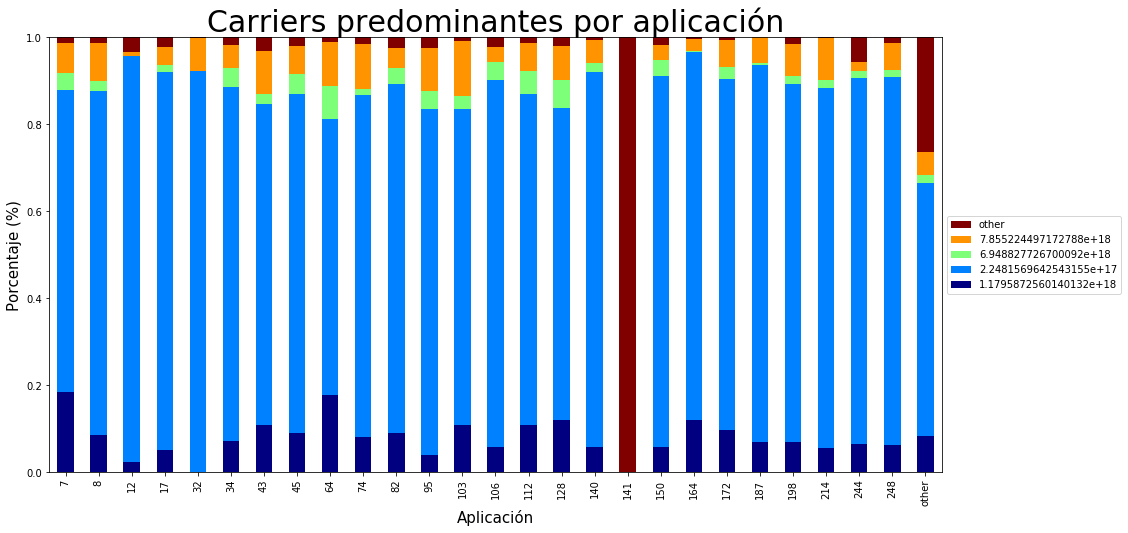

In [209]:
us = pd.DataFrame(events.groupby(['application_id', 'carrier']).size())
us.columns = ['cant']
us.reset_index(inplace = True)
piv = pd.pivot_table(us, values = 'cant', columns = 'carrier', index = 'application_id')
piv = piv.divide(piv.sum(axis = 1), axis = 0)
piv.columns = ['1.1795872560140132e+18', '2.2481569642543155e+17', '6.948827726700092e+18', '7.855224497172788e+18', 'other']
f = plt.figure()
plt.title('Carriers predominantes por aplicación',size=30)
ax = piv.plot(kind='bar', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)', size = 15);
ax.set_xlabel('Aplicación', size = 15);
ax.set_ylim(0,1)
plt.show()

In [231]:
counts = top10events['application_id'].value_counts()
indexes = counts[counts<30000].index
mask_dict = dict.fromkeys(indexes, 'other')
top10events.loc[:,'application_id'] = top10events['application_id'].replace(mask_dict)
top10events['application_id'].value_counts()

66       322334
other    256135
64       254198
145      249345
103      135295
63       134666
57       112246
212      107776
121       69699
10        58311
120       36258
Name: application_id, dtype: int64

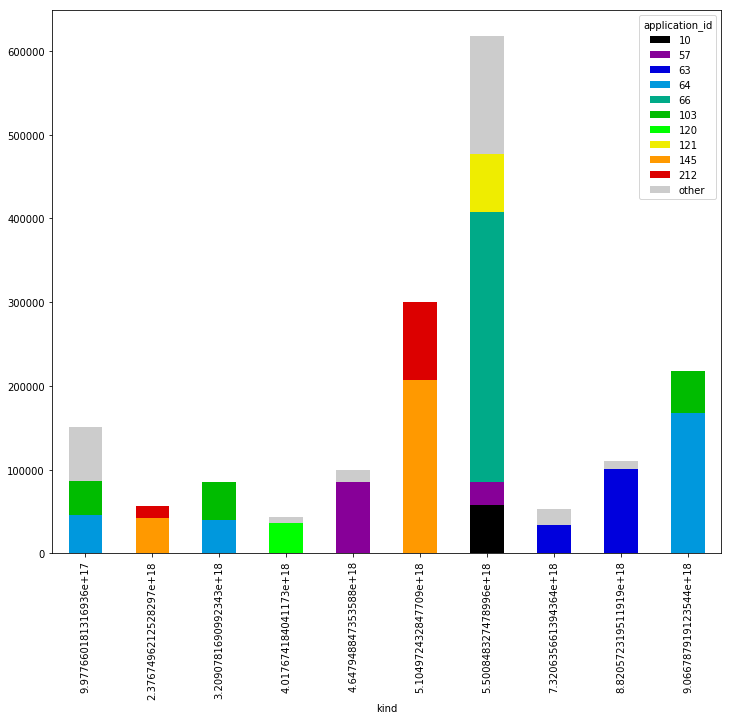

In [235]:
appsXEvent = top10events[['kind', 'application_id']].groupby('kind').agg({'application_id' : 'value_counts'})
appsXEvent['application_id'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,10), cmap = 'nipy_spectral')
plt.show()

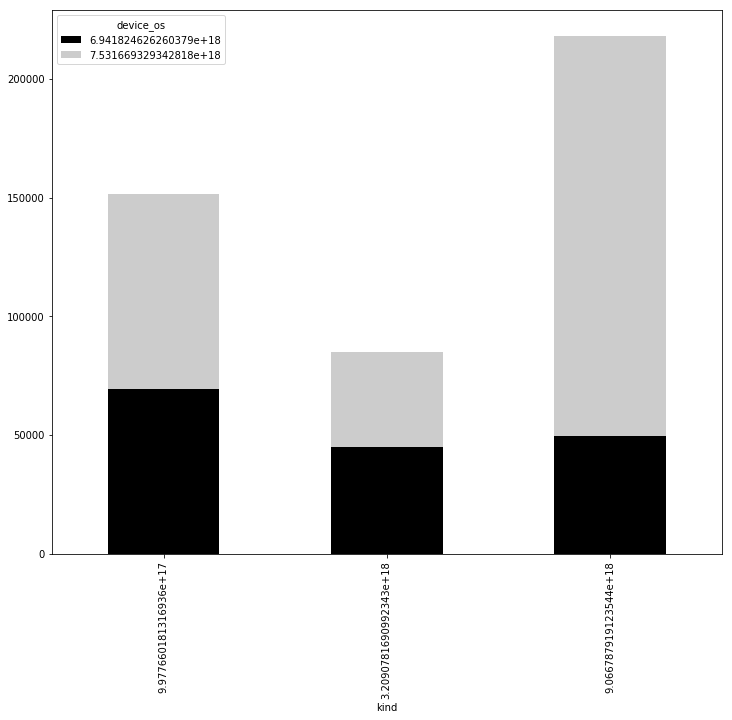

In [236]:
osXEvents = top10events[['kind', 'device_os']].groupby('kind').agg({'device_os' : 'value_counts'})
osXEvents['device_os'].unstack().plot(kind = 'bar', stacked = True, figsize = (12,10), cmap = 'nipy_spectral')
plt.show()

In [237]:
top10events['device_os'].isnull().sum()

1282184